# Lyft System Data exploration
## by Ahmed ElSabbagh

## Investigation Overview

Lyft is a very major transportation and ride sharing company, and one of their primary source of income is bike sharing, where nayone can rent a bike or a scooter from a station and leave it in another, allowing a cheap and easily accessible low hassle transportation. However since less people are going to work due to covid-19, and since people are generally afraid of grabbing shared stuff, like the bikes, Lyft and other companies like Uber might be facing a major issue. We will investigate how hard did the pandamic strike the company by looking into the data provided publically by Lyft, and view how much they are compared in a specific period of time.



## Dataset Overview

The data we are following today is the Lyft system data, which Lyft had offered recently to the public as of January 2020, the data has been divided into all of 2017 data, and then divided per month (january, february etc) for each year from 2017 to current 2020, most recently updated was April Data.

Lyft is bike rental company, allowing the user to rent a bike from some station, use them for transportation, and drop them in another rental station, and depending on how long it took, the money automatically paid from the credit card.

The dataset to be used consists of all the trip data starting from 2018 to 2020 on the specific month of April, the reason is that it is the most recent dataset in 2020, and that it is the perfect time for the exploration of the effects of covid-19 on Lyft's business over the same yearly time period, which means relatively same weather conditions and therefore availablity is the only factor in 2018 and covid-19 in 2020.

We will be focusing on trip duration and number of trips as the main points of comparison between the various years. Also as a part of general study, I will be looking into those who were subscribed and the casual customers, and how manny trip Lyft have lost from either of them, as well as the day in the week comparison where we are supposed to look which days are more profitable and which were the worst hit.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df2019 = pd.read_csv("201904-fordgobike-tripdata.csv")
df2020 = pd.read_csv("202004-baywheels-tripdata.csv")
df2018 = pd.read_csv("201804-fordgobike-tripdata.csv")

In [3]:
def getIfWeekDay(df,form,field):
    k = 0 
    df['week_day'] = df[field]
    for i in df[field]:
        day =  int(datetime.strptime(i, form).weekday())
        if day == 5 or day == 6:
            df['week_day'][k] = 'week_end'
        else:
            df['week_day'][k] = 'week_day'
        k+=1

In [4]:
k = 0 
form = "%Y-%m-%d %H:%M:%S"
df2020Modified = df2020.copy()
df2020Modified['duration_sec']=df2020.started_at
for i,j in zip(df2020.started_at,df2020.ended_at):
    df2020Modified['duration_sec'][k] = int((datetime.strptime(j, form) -datetime.strptime(i,form)).seconds)
    k+=1

In [5]:
df2020Modified["user_type"] = df2020Modified['member_casual']
df2020Modified["user_type"].replace({"casual": "Casual", "member": "Subscriber"}, inplace=True)

In [6]:
def cleanData(df,wantedTables):
    for i in df:
        if i not in wantedTables:
            del df[i]
    df.dropna()

In [7]:
df2019WantedData=['duration_sec','user_type',"week_day","start_lat","start_lng"]
df2020WantedData=['duration_sec','user_type',"week_day","start_lat","start_lng"]



In [8]:
df2018Modified = df2018.drop_duplicates()
df2019Modified = df2019.drop_duplicates()
df2020Modified2 = df2020Modified.drop_duplicates()

df2018Modified["user_type"].replace({"Customer": "Casual"}, inplace=True)
df2019Modified["user_type"].replace({"Customer": "Casual"}, inplace=True)

getIfWeekDay(df2020Modified2,"%Y-%m-%d %H:%M:%S","started_at")
getIfWeekDay(df2019Modified,"%Y-%m-%d %H:%M:%S.%f","start_time")
getIfWeekDay(df2018Modified,"%Y-%m-%d %H:%M:%S.%f","start_time")




In [9]:
df2019Modified2 = df2019Modified.rename(columns={"start_station_latitude": "start_lat",
                                                 "start_station_longitude": "start_lng"})
df2018Modified2 = df2018Modified.rename(columns={"start_station_latitude": "start_lat",
                                                 "start_station_longitude": "start_lng"})

cleanData(df2018Modified2,df2019WantedData)
cleanData(df2019Modified2,df2019WantedData)
cleanData(df2020Modified2,df2020WantedData)

df2020Modified2[["duration_sec"]] = df2020Modified2[["duration_sec"]].apply(pd.to_numeric)

df2020Modified2["year"]=2020
df2019Modified2["year"]=2019
df2018Modified2["year"]=2018

In [10]:
df_final = df2020Modified2.append(df2019Modified2).append(df2018Modified2)
df_final['duration_min'] = df_final['duration_sec']/60
df_final["year"] = df_final["year"].astype(str)
df_final.duration_min = df_final.duration_min.astype("float64")
df_final.duration_sec = df_final.duration_sec.astype("float64")
df_final.drop(df_final.query("duration_min> 90").index,inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441150 entries, 10 to 131168
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   start_lat     441150 non-null  float64
 1   start_lng     441150 non-null  float64
 2   duration_sec  441150 non-null  float64
 3   user_type     441150 non-null  object 
 4   week_day      441150 non-null  object 
 5   year          441150 non-null  object 
 6   duration_min  441150 non-null  float64
dtypes: float64(4), object(3)
memory usage: 26.9+ MB


## What was more profitable?

This answer to the question are two, subscribers and week days. Ignoring the year for now, most of rides were in those 3 years were made by subscribing/member users of the service. 

And similarly, most of these trips were made on regular work days instead of weekends.

So...... How different the situation has become after covid-19?

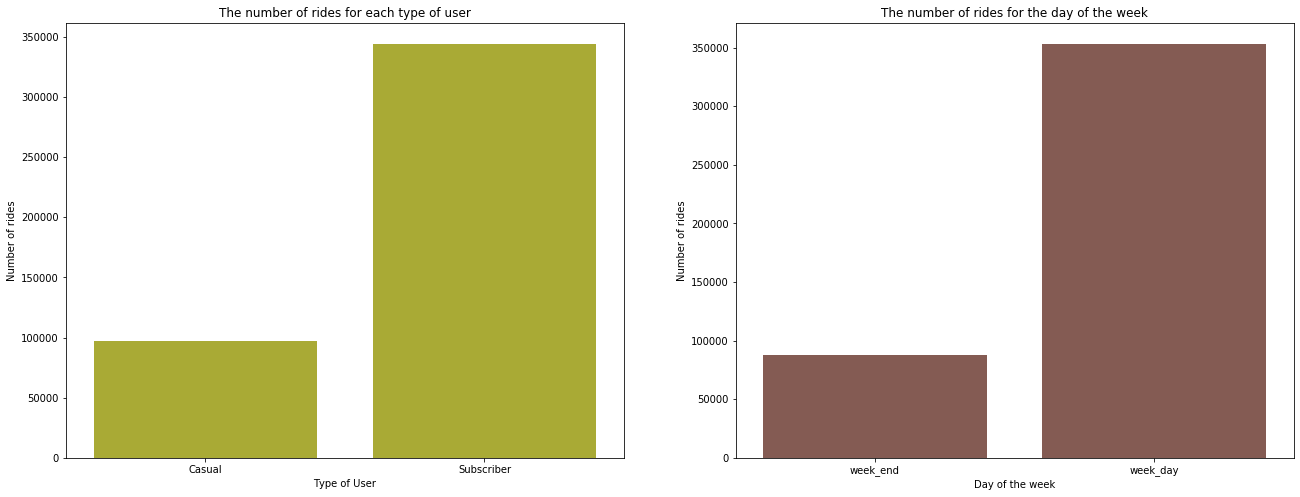

In [11]:
plt.figure(figsize = [22, 8])

base_color = sb.color_palette()[0];
duration_per_year = df_final.groupby("year").duration_min.sum();
years = duration_per_year.index;



plt.subplot(1, 2, 1)
base_color = sb.color_palette()[8];
ax1 = sb.countplot(data = df_final, x = 'user_type',color=base_color);
ax1.set_title("The number of rides for each type of user");
ax1.set_ylabel("Number of rides");
ax1.set_xlabel("Type of User");


plt.subplot(1, 2, 2)
base_color = sb.color_palette()[5];
ax2 = sb.countplot(data = df_final, x = 'week_day',color=base_color, order=["week_end","week_day"]);
ax2.set_title("The number of rides for the day of the week");
ax2.set_ylabel("Number of rides");
ax2.set_xlabel("Day of the week");



## How much did it change?

As we can see, a lot. Lyft had only acquired several massive bike businesses which expanded it's business in the late 2018. Afterwards, Lyft was able to earn massive profits in 2019 thanks to the increased number of rides. This would change however in April 2020 with the plummeting number of rides being much less than 2018 itself.

Curiously however total time people actually rode those bikes did not drop as much. In other words, Lyft may be getting a third of its rides compared to 2019 and and two thirds compared to 2018. But they still receive as much total ride time as in 2018.

But who was responsible for this decrease?

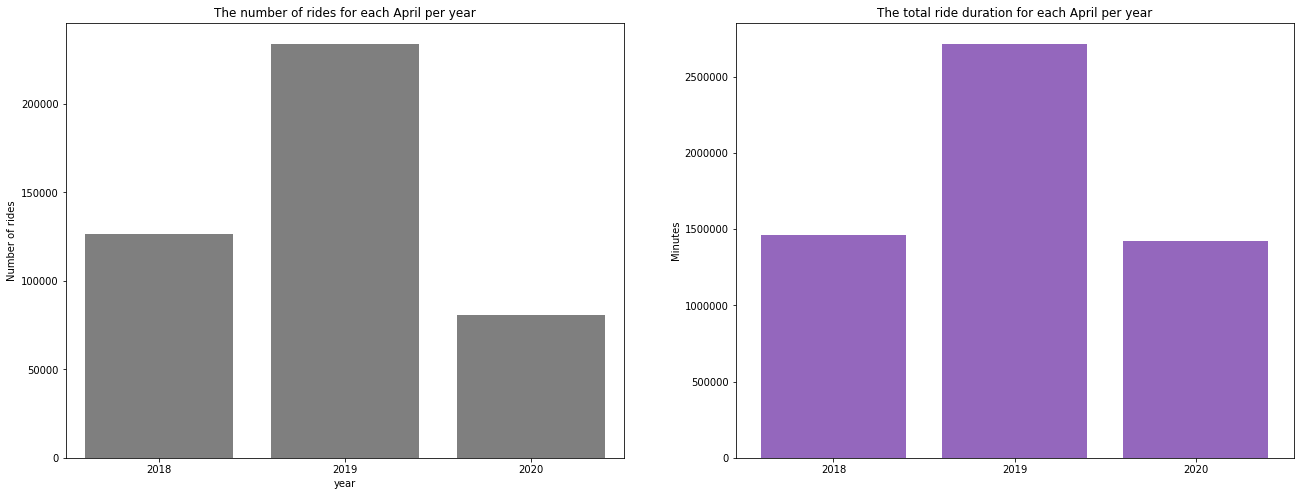

In [12]:
plt.figure(figsize = [22, 8])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[7];
ax3 = sb.countplot(data = df_final, x = 'year',color=base_color);
ax3.set_title("The number of rides for each April per year");
ax3.set_ylabel("Number of rides");


plt.subplot(1, 2, 2)
base_color = sb.color_palette()[4];
plt.bar(years, duration_per_year, align='center',color=base_color);
plt.title("The total ride duration for each April per year");
plt.xticks(list(years));
plt.ylabel("Minutes");

## Casuals and Subscribers

Lyft's business model regarding bikes is as follows, pick a bike, pay 2USD to unlock, and 0.20USD for every minute on the ride, subscribers pay 15USD a month, for that they pay 0.15USD with no unlock fees.

So maintaining the subscribers is Lyft's primary focus, because they are most likely to be numerous, and they are more likely to use the bikes for much longer since they pay less.

With the premise of subscribers and casuals established, it comes as a great suprise that the number of casual rides have actually increased in 2020. 

The simplest way to explain it is that people have cancelled their subscription which they no longer make full use of, and instead ride casual whenever they need to, which explains the increase in causal rides. Subsequently there are far less subscribers who just cancelled subscription and no longer use Lyft at all because of the lockdown, which severely harmed the number of rides.

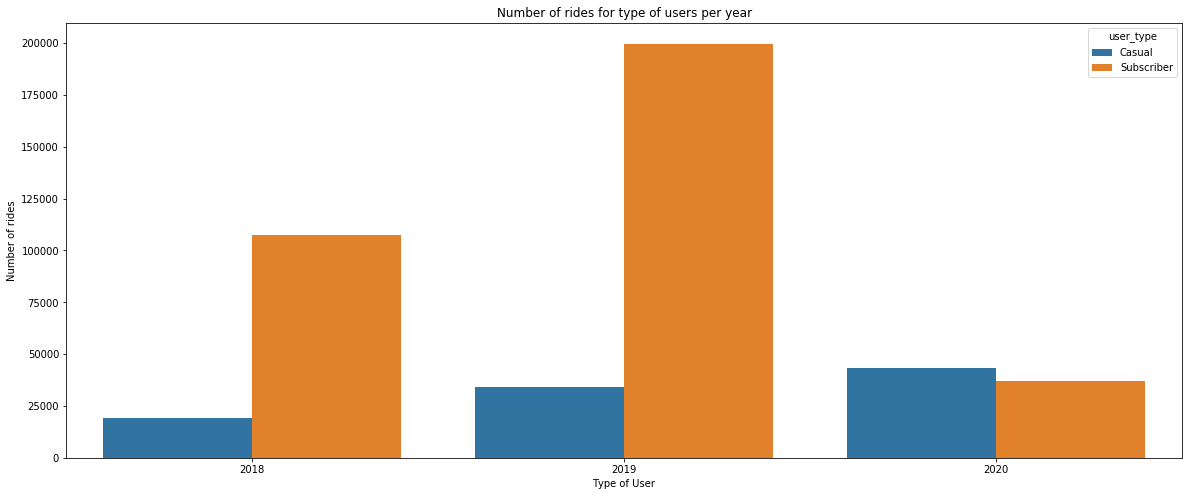

In [13]:
plt.figure(figsize = [20, 8])

ax = sb.countplot(data = df_final, x = 'year', hue = 'user_type')
ax.set_ylabel("Number of rides")
ax.set_xlabel("Type of User")
plt.title("Number of rides for type of users per year");



What is trully suprising however is that the total ride time has increased for casuals, which is counter intuitive since they would usually be the most encouraged to make the rides as short as possible. 

What if we look into the rides on more individual level, what could we get?

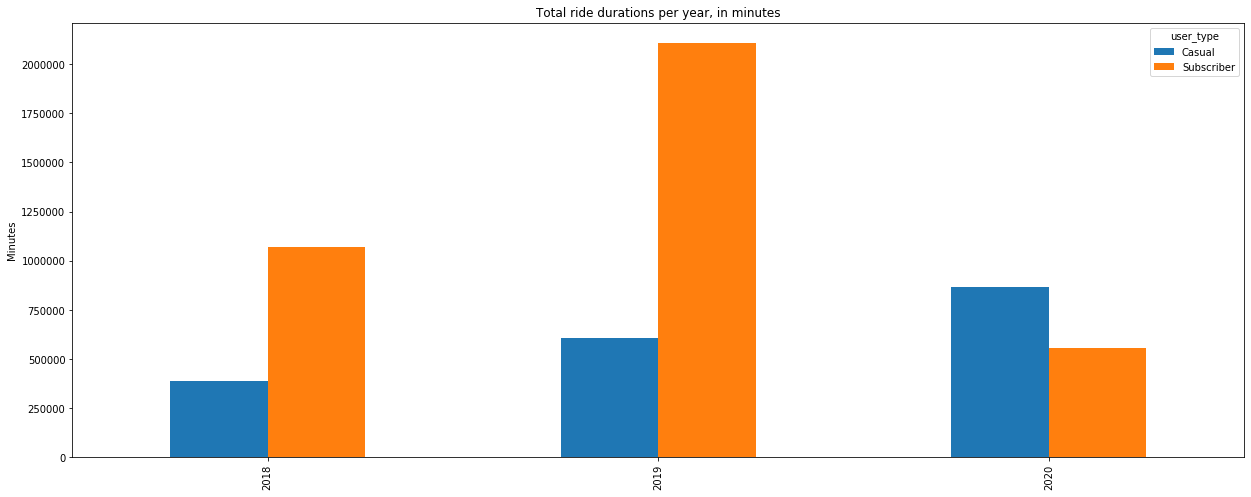

In [21]:

x = df_final.groupby(["year","user_type"])
data = []
for i,j in zip(x.duration_min.sum(),x.duration_min.sum().index):
    temp = []
    temp.append(j[0])
    temp.append(j[1])
    temp.append(i)
    data.append(temp)
df = pd.DataFrame(data,columns=['year','user_type','duration']);

df.pivot("year", "user_type", "duration").plot(kind='bar',figsize=(21,8));
plt.ylabel("Minutes");
plt.xlabel("");
plt.title("Total ride durations per year, in minutes");

## Unusual time trends

We said that casuals should be concerned with time, because they pay more, as it turns out, they have always been the users with the longest duration. 
Most subscribers have rides less than 80 minutes, while a mass majority of users get past 80 minutes since 2018. And has in fact doubled in 2020.

But how could this be explained.

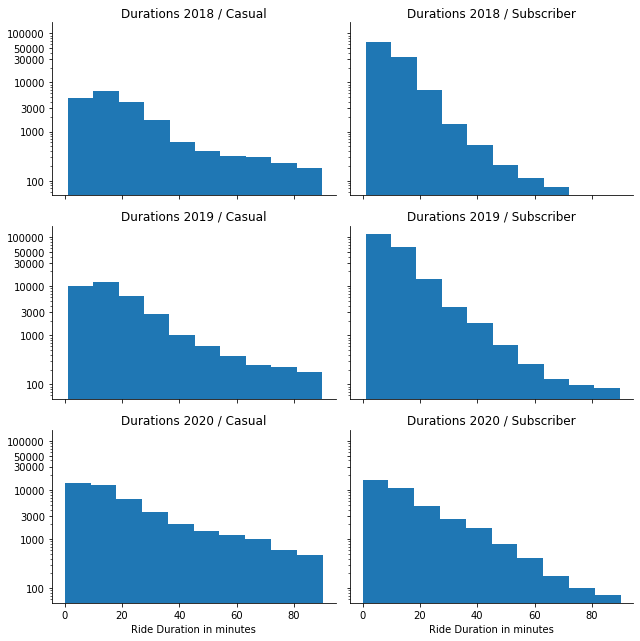

In [20]:

g = sb.FacetGrid(data = df_final, row = 'year' ,col="user_type", height = 3,aspect = 1.5);
g.map(plt.hist, "duration_min").set(yscale = 'log');
ticks = [100, 1000,3000, 10000,30000,50000, 100000]
labels = [i for i in ticks]
g.set(yticks = ticks, yticklabels = labels);

axes = g.axes.flatten()
axes[1].set_title("Durations 2018 / Subscriber");
axes[3].set_title("Durations 2019 / Subscriber");
axes[5].set_title("Durations 2020 / Subscriber");

axes[0].set_title("Durations 2018 / Casual");
axes[2].set_title("Durations 2019 / Casual");
axes[4].set_title("Durations 2020 / Casual");

axes[4].set_xlabel("Ride Duration in minutes");
axes[5].set_xlabel("Ride Duration in minutes");

## Leasure and quality time 

The best explanation I could give is the need for quality time, lockdowns can be borring, and many people have taken time off.

From this chart, we find that in 2020, the numebr of rides above 80 minutes have increased in both weekends and regular week days. There is absolutely no good explanation for that increase, especially that it is expected that ride duration would decrease because of the lack of massive traffic jams. 

Therefore the only good reason I could find for anyone to take that time on a ride, is simply the need for fun and leasure. 

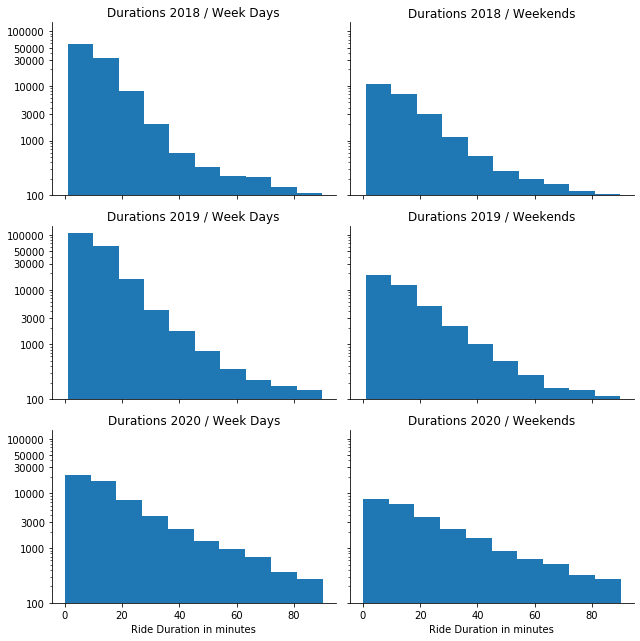

In [19]:

g = sb.FacetGrid(data = df_final, col = 'week_day' ,row="year", height = 3,aspect = 1.5);
g.map(plt.hist, "duration_min").set(yscale = 'log');
ticks = [100, 1000,3000, 10000,30000,50000, 100000]
labels = [i for i in ticks]

g.set(yticks = ticks, yticklabels = labels);

axes = g.axes.flatten();



axes[0].set_title("Durations 2018 / Week Days");
axes[2].set_title("Durations 2019 / Week Days");
axes[4].set_title("Durations 2020 / Week Days");

axes[1].set_title("Durations 2018 / Weekends");
axes[3].set_title("Durations 2019 / Weekends");
axes[5].set_title("Durations 2020 / Weekends");

axes[4].set_xlabel("Ride Duration in minutes");
axes[5].set_xlabel("Ride Duration in minutes");

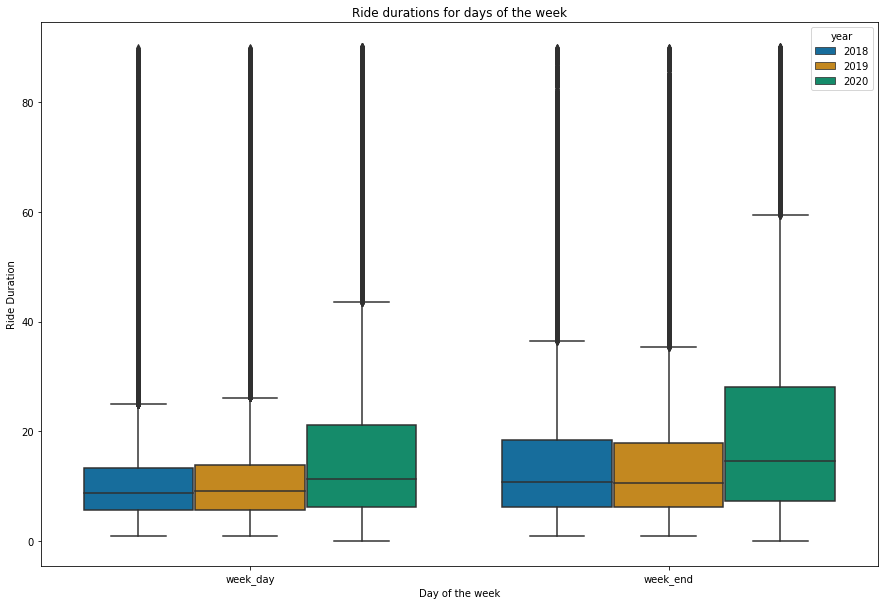

In [18]:
plt.figure(figsize = [15, 10])

sb.boxplot(y='duration_min', x='week_day', 
                 data=df_final, 
                 palette="colorblind",
                 hue='year');
plt.xlabel("Day of the week");
plt.ylabel("Ride Duration");
plt.title("Ride durations for days of the week");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --template output-toggle.tpl --post serve`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!